# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.2

In questo esercizio calcoleremo i valori istantanei dell'energia potenziale nelle seguenti condizioni, usando una simulazione Monte Carlo all'equilibrio, per $M=5\times 10^5$ step, e l'accettanza a circa il $50$ percento:
| Fase   | Densità $\rho^\star$ | Temperatura $T^\star$ | Raggio di Cut-off $r_c$ | Delta |
|--------|-----------------------|-----------------------|-------------------------|-------|
| Solido | 1.1                   | 0.8                   | 2.2                     |0.055  |
| Liquido| 0.8                   | 1.1                   | 2.5                     |0.1    |
| Gas    | 0.05                  | 1.2                   | 5.0                     |10     |

Nella cella sottostante possiamo vedere il calcolo e il grafico dell'autocorrelazione di $U/N$ per le tre fasi, in funzione del numero di blocchi, in modo da stimare quanto grandi devono essere i blocchi quando faccio la simulazione. Nei grafici seguenti è poi possibile vedere la stima dell'errore per diverse grandezze del blocco.

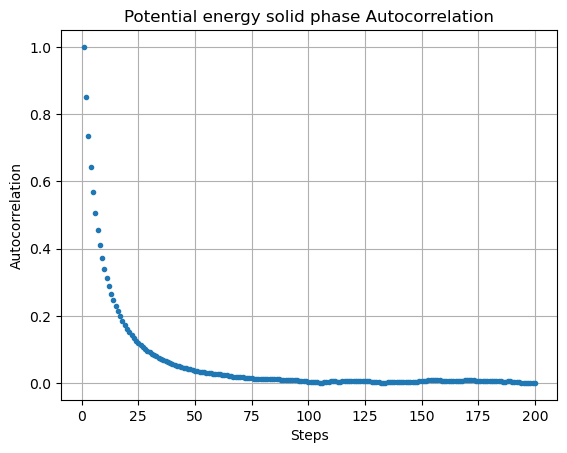

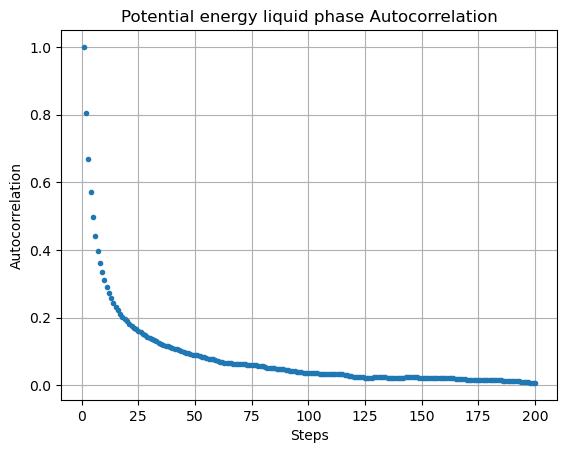

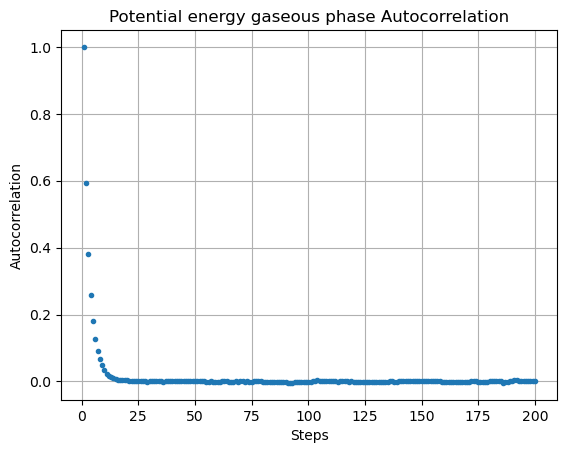

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(data, tmax):
    n = len(data)
    variance = np.var(data)
    autocorr = np.zeros(tmax)
    
    for i in range(tmax):
        sum1 = np.dot(data[:n-i], data[i:])
        sum2 = np.sum(data[:n-i])
        sum3 = np.sum(data[i:])
        
        num = (1/(n-i)) * sum1 - (1/(n-i)) * sum2 * (1/(n-i)) * sum3
        autocorr[i] = num / variance
    
    return autocorr

def plot_autocorrelation(filename, phase, max_steps=200):
    blocks = []
    total_energy = []
    error_total_energy = []
    autocorr = []

    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue

            data = line.strip().split()
            blocks.append(float(data[0]))
            total_energy.append(float(data[1]))
            error_total_energy.append(float(data[3]))

    # Calcolo la lunghezza del file per utilizzarla come tmax
    tmax = 200

    # Calcolo dell'autocorrelazione usando solo i primi 200 dati
    autocorr = autocorrelation(total_energy, tmax)

    plt.errorbar(blocks[:max_steps], autocorr[:max_steps], fmt='o', markersize=3)
    plt.xlabel('Steps')
    plt.ylabel('Autocorrelation')
    plt.title(f'Potential energy {phase} phase Autocorrelation')
    plt.grid(True)
    plt.show()

# Calcolo e plot per la fase solida
plot_autocorrelation("./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_solido.dat", "solid")

# Calcolo e plot per la fase liquida
plot_autocorrelation("./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_liquido.dat", "liquid")

# Calcolo e plot per la fase gassosa
plot_autocorrelation("./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_gassoso.dat", "gaseous")


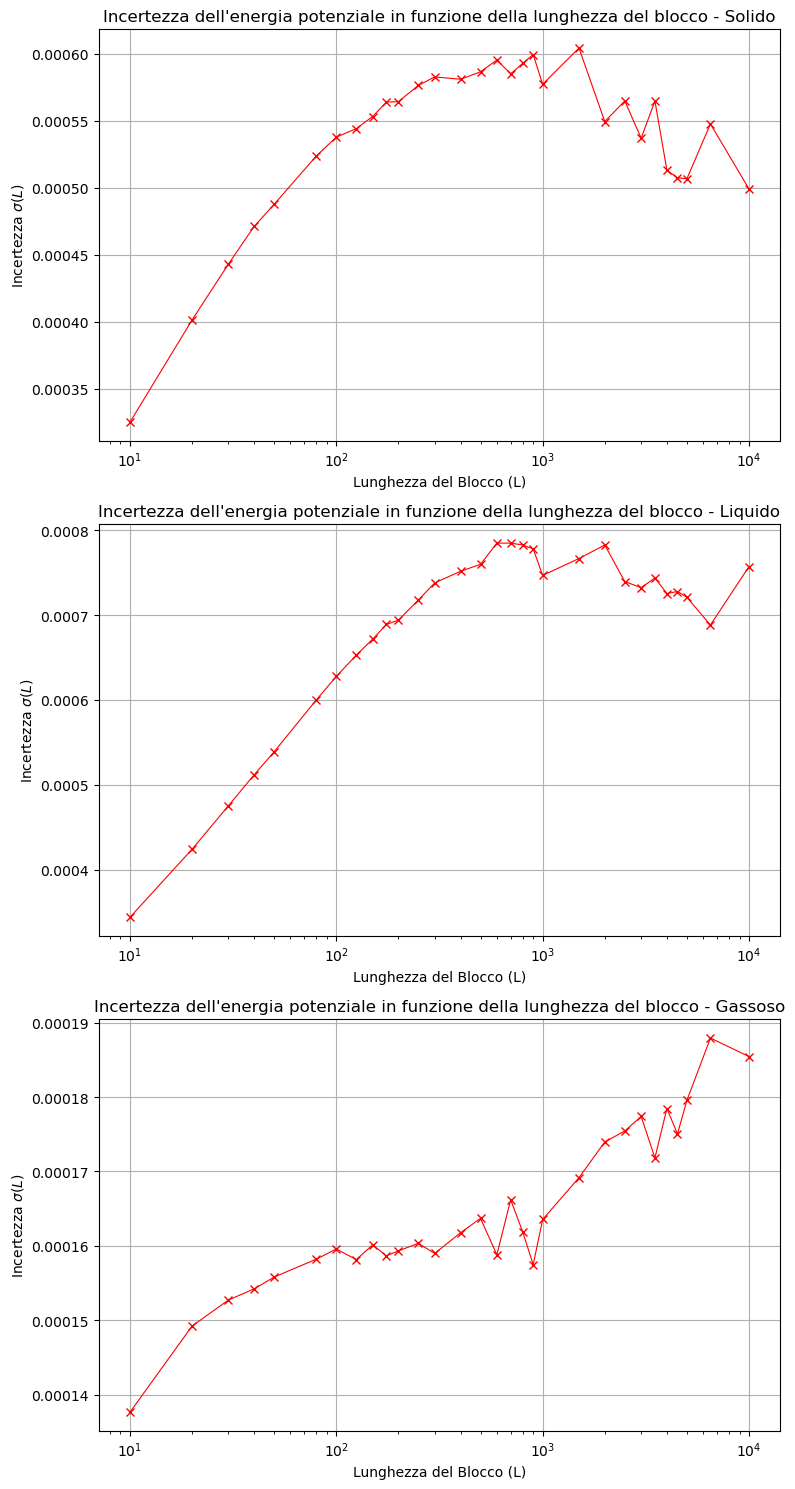

In [2]:

# Funzione per leggere i dati dal file
def leggi_dati(file_name):
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            data.append(float(line.strip().split()[1]))  # Estrae solo l'energia istantanea
    return np.array(data)

# Funzione per calcolare la varianza
def variance(data):
    if data.shape[0] == 1:
        return 0
    sum_squared = np.sum(data * data)
    sum = np.sum(data)
    lenght = len(data)
    return (sum_squared / lenght - (sum / lenght) ** 2) / (lenght - 1)

# File names
files = ["./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_solido.dat", "./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_liquido.dat", "./nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy_gassoso.dat"]
phases = ["Solido", "Liquido", "Gassoso"]

# Lunghezze dei blocchi
L = [10, 20, 30, 40, 50, 80, 100, 125, 150, 175, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6500, 10000]

# Definisci la dimensione del plot
fig, axx = plt.subplots(3, 1, figsize=(8, 15), tight_layout=True)

# Loop attraverso i file e le fasi
for i, file_name in enumerate(files):
    data = leggi_dati(file_name)

    # Numero di blocchi per ciascuna lunghezza
    N = len(data) / np.array(L) #calcola il numero di blocchi che possono essere creati per ciascuna lunghezza di blocco
    N = N.astype(int) #converte il numero all'intero più vicino

    # Array per contenere i valori di sigma
    sigma = np.zeros(len(L))

    # Calcolo delle incertezze
    for j, length in enumerate(L):
        averages = np.zeros(N[j])
        for k in range(N[j]):
            block = data[k * length:(k + 1) * length]
            averages[k] = np.sum(block) / length
        sigma[j] = np.sqrt(variance(averages))

    # Visualizzazione dei risultati
    ax = axx[i]
    ax.plot(L, sigma, linestyle="-", marker="x", color="r", linewidth=0.8)
    ax.set_xscale('log')
    ax.set_xlabel("Lunghezza del Blocco (L)")
    ax.set_ylabel(r"Incertezza $\sigma(L)$")
    ax.set_title(f"Incertezza dell'energia potenziale in funzione della lunghezza del blocco - {phases[i]}")
    ax.grid(True)

plt.show()


### Exercise 07.4
In questo esercizio, faremo una simulazione Monte Carlo, di un modello di lennard-Jones dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
| Fase   | Densità $\rho^\star$ | Temperatura $T^\star$ | Raggio di Cut-off $r_c$ | Delta |
|--------|-----------------------|-----------------------|-------------------------|-------|
| Solido | 1.1                   | 0.8                   | 2.2                     |0.055  |
| Liquido| 0.8                   | 1.1                   | 2.5                     |0.1    |
| Gas    | 0.05                  | 1.2                   | 5.0                     |10     |

Nella cella seguente si possono vedere i grafici e le incertezze dell'energia potenziale per particella, della pressione e della $g(r)$ e il fatta con il Monte Carlo. 

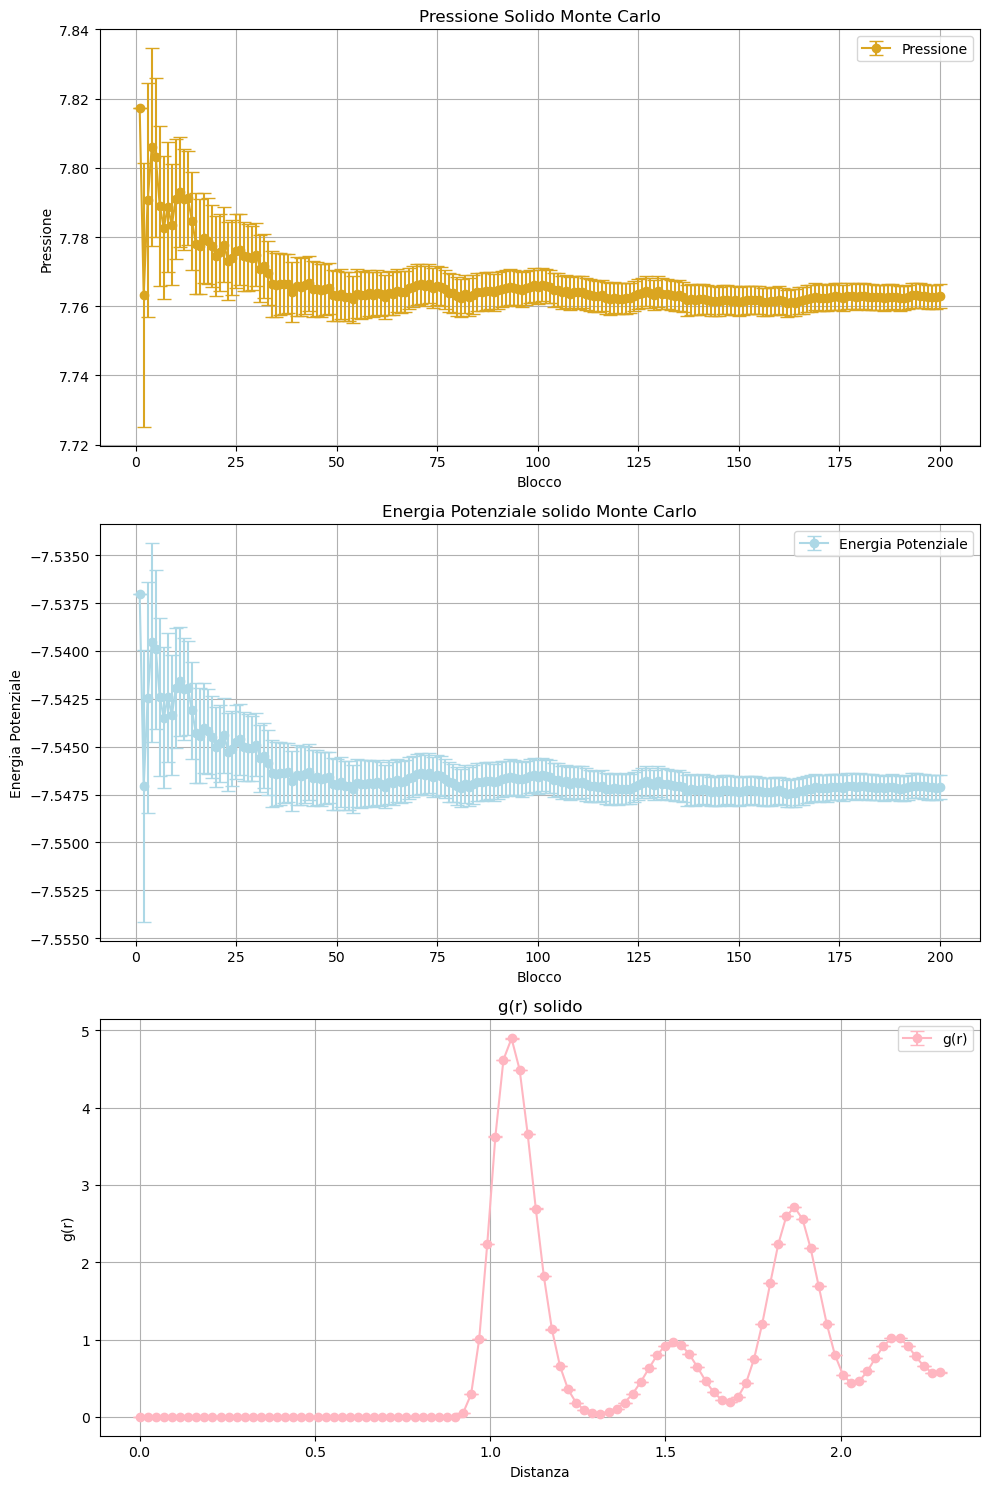

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per leggere i dati da un file con colonne x, y e errore
def read_data(filename, usecols):
    try:
        data = np.loadtxt(filename, usecols=usecols)  # Leggi le colonne specificate
        x = data[:, 0]  # Colonna 0 (x)
        y = data[:, 1]  # Colonna 1 (y)
        y_err = data[:, 2] if len(data[0]) > 2 else np.zeros_like(y)  # Usa array vuoti se non ci sono errori
        return x, y, y_err
    except ValueError as e:
        print(f"Errore nella lettura del file {filename}: {e}")
        return np.array([]), np.array([]), np.array([])  # Ritorna array vuoti in caso di errore

# Leggi i dati dai file
x_pressure, y_pressure, y_err_pressure = read_data('./simulazioni_monte_carlo/pressure_7.4_solido.dat', usecols=(0, 2, 3))
x_potential, y_potential, y_err_potential = read_data('./simulazioni_monte_carlo/potential_energy_7.4_solido.dat', usecols=(0, 2, 3))

# Leggi i dati dal file gofr
def read_gofr_data(filename):
    try:
        data = np.loadtxt(filename, usecols=(0, 1, 2))  # Leggi le colonne 0, 1 e 2
        x = data[:, 0]  # Colonna 0 (x)
        y = data[:, 1]  # Colonna 1 (y)
        y_err = data[:, 2]  # Colonna 2 (errore su y)
        return x, y, y_err
    except ValueError as e:
        print(f"Errore nella lettura del file {filename}: {e}")
        return np.array([]), np.array([]), np.array([])  # Ritorna array vuoti in caso di errore

x_gofr, y_gofr, y_err_gofr = read_gofr_data('./simulazioni_monte_carlo/gofr_7.4_solido.dat')

# Crea una figura e assi per i grafici
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Grafico per la pressione
axs[0].errorbar(x_pressure, y_pressure, yerr=y_err_pressure, fmt='o', color='goldenrod', label='Pressione', linestyle='-', capsize=5)
axs[0].set_xlabel('Blocco')
axs[0].set_ylabel('Pressione')
axs[0].set_title('Pressione Solido Monte Carlo')
axs[0].legend()
axs[0].grid(True)  # Aggiungi la griglia

# Grafico per l'energia potenziale
axs[1].errorbar(x_potential, y_potential, yerr=y_err_potential, fmt='o', color='lightblue', label='Energia Potenziale', linestyle='-', capsize=5)
axs[1].set_xlabel('Blocco')
axs[1].set_ylabel('Energia Potenziale')
axs[1].set_title('Energia Potenziale solido Monte Carlo')
axs[1].legend()
axs[1].grid(True)  # Aggiungi la griglia

# Grafico per g(r) con linea che connette i punti
axs[2].errorbar(x_gofr, y_gofr, yerr=y_err_gofr, fmt='o', color='lightpink', label='g(r)', linestyle='-', capsize=5)
axs[2].set_xlabel('Distanza')
axs[2].set_ylabel('g(r)')
axs[2].set_title('g(r) solido')
axs[2].legend()
axs[2].grid(True)  # Aggiungi la griglia

# Mostra i grafici
plt.tight_layout()
plt.show()


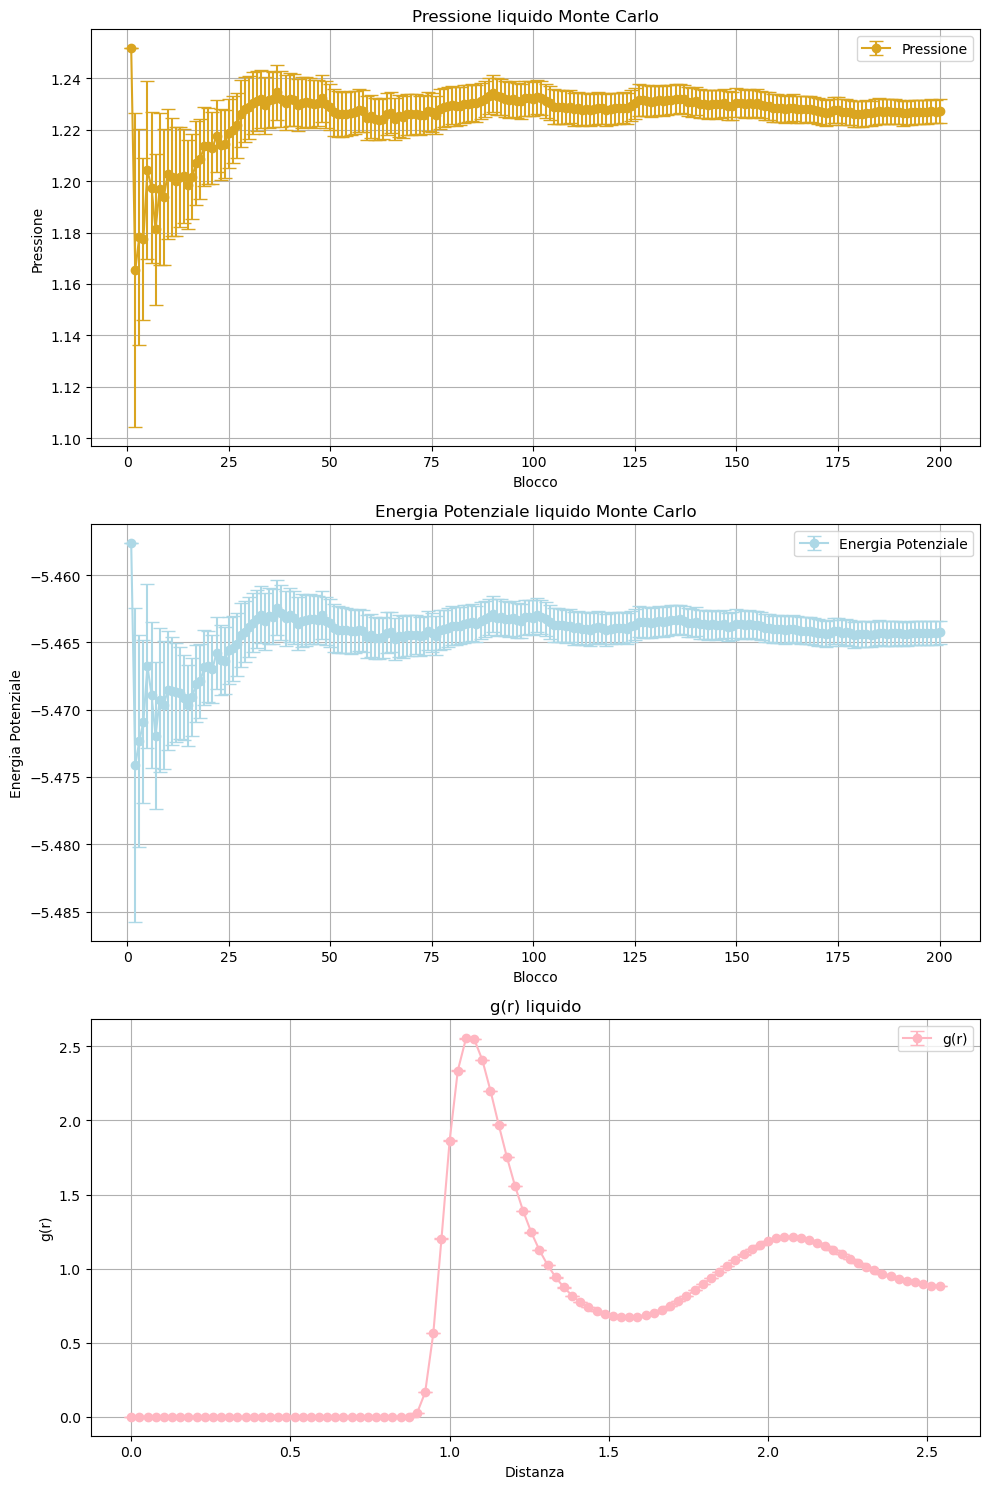

In [9]:
x_pressure, y_pressure, y_err_pressure = read_data('./simulazioni_monte_carlo/pressure_7.4_liquido.dat', usecols=(0, 2, 3))
x_potential, y_potential, y_err_potential = read_data('./simulazioni_monte_carlo/potential_energy_7.4_liquido.dat', usecols=(0, 2, 3))

x_gofr, y_gofr, y_err_gofr = read_gofr_data('./simulazioni_monte_carlo/gofr_7.4_liquido.dat')

# Crea una figura e assi per i grafici
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Grafico per la pressione
axs[0].errorbar(x_pressure, y_pressure, yerr=y_err_pressure, fmt='o', color='goldenrod', label='Pressione', linestyle='-', capsize=5)
axs[0].set_xlabel('Blocco')
axs[0].set_ylabel('Pressione')
axs[0].set_title('Pressione liquido Monte Carlo')
axs[0].legend()
axs[0].grid(True)  # Aggiungi la griglia

# Grafico per l'energia potenziale
axs[1].errorbar(x_potential, y_potential, yerr=y_err_potential, fmt='o', color='lightblue', label='Energia Potenziale', linestyle='-', capsize=5)
axs[1].set_xlabel('Blocco')
axs[1].set_ylabel('Energia Potenziale')
axs[1].set_title('Energia Potenziale liquido Monte Carlo')
axs[1].legend()
axs[1].grid(True)  # Aggiungi la griglia

# Grafico per g(r) con linea che connette i punti
axs[2].errorbar(x_gofr, y_gofr, yerr=y_err_gofr, fmt='o', color='lightpink', label='g(r)', linestyle='-', capsize=5)
axs[2].set_xlabel('Distanza')
axs[2].set_ylabel('g(r)')
axs[2].set_title('g(r) liquido')
axs[2].legend()
axs[2].grid(True)  # Aggiungi la griglia

# Mostra i grafici
plt.tight_layout()
plt.show()


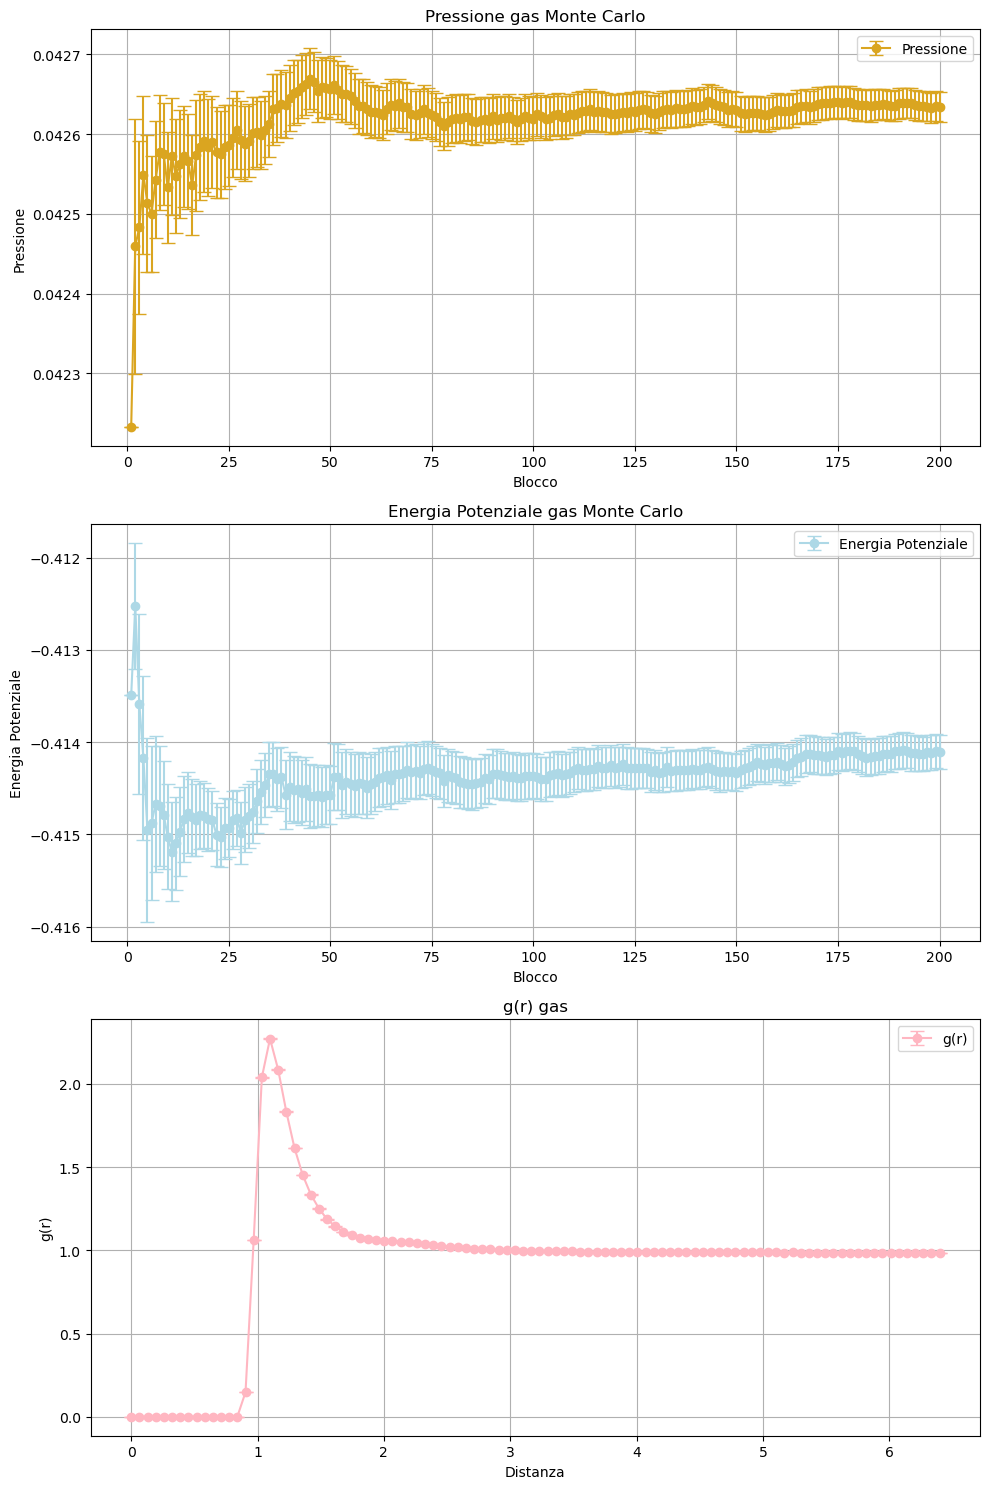

In [8]:
x_pressure, y_pressure, y_err_pressure = read_data('./simulazioni_monte_carlo/pressure_7.4_gas.dat', usecols=(0, 2, 3))
x_potential, y_potential, y_err_potential = read_data('./simulazioni_monte_carlo/potential_energy_7.4_gas.dat', usecols=(0, 2, 3))

x_gofr, y_gofr, y_err_gofr = read_gofr_data('./simulazioni_monte_carlo/gofr_7.4_gas.dat')

# Crea una figura e assi per i grafici
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Grafico per la pressione
axs[0].errorbar(x_pressure, y_pressure, yerr=y_err_pressure, fmt='o', color='goldenrod', label='Pressione', linestyle='-', capsize=5)
axs[0].set_xlabel('Blocco')
axs[0].set_ylabel('Pressione')
axs[0].set_title('Pressione gas Monte Carlo')
axs[0].legend()
axs[0].grid(True)  # Aggiungi la griglia

# Grafico per l'energia potenziale
axs[1].errorbar(x_potential, y_potential, yerr=y_err_potential, fmt='o', color='lightblue', label='Energia Potenziale', linestyle='-', capsize=5)
axs[1].set_xlabel('Blocco')
axs[1].set_ylabel('Energia Potenziale')
axs[1].set_title('Energia Potenziale gas Monte Carlo')
axs[1].legend()
axs[1].grid(True)  # Aggiungi la griglia

# Grafico per g(r) con linea che connette i punti
axs[2].errorbar(x_gofr, y_gofr, yerr=y_err_gofr, fmt='o', color='lightpink', label='g(r)', linestyle='-', capsize=5)
axs[2].set_xlabel('Distanza')
axs[2].set_ylabel('g(r)')
axs[2].set_title('g(r) gas')
axs[2].legend()
axs[2].grid(True)  # Aggiungi la griglia

# Mostra i grafici
plt.tight_layout()
plt.show()